# Surface Generator

This is devoted into developing a preprocesisng framework for generating a random 3D surface for initialization. The idea is to add random sin waves within a particular range and then rescale.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

%matplotlib notebook

<IPython.core.display.Javascript object>


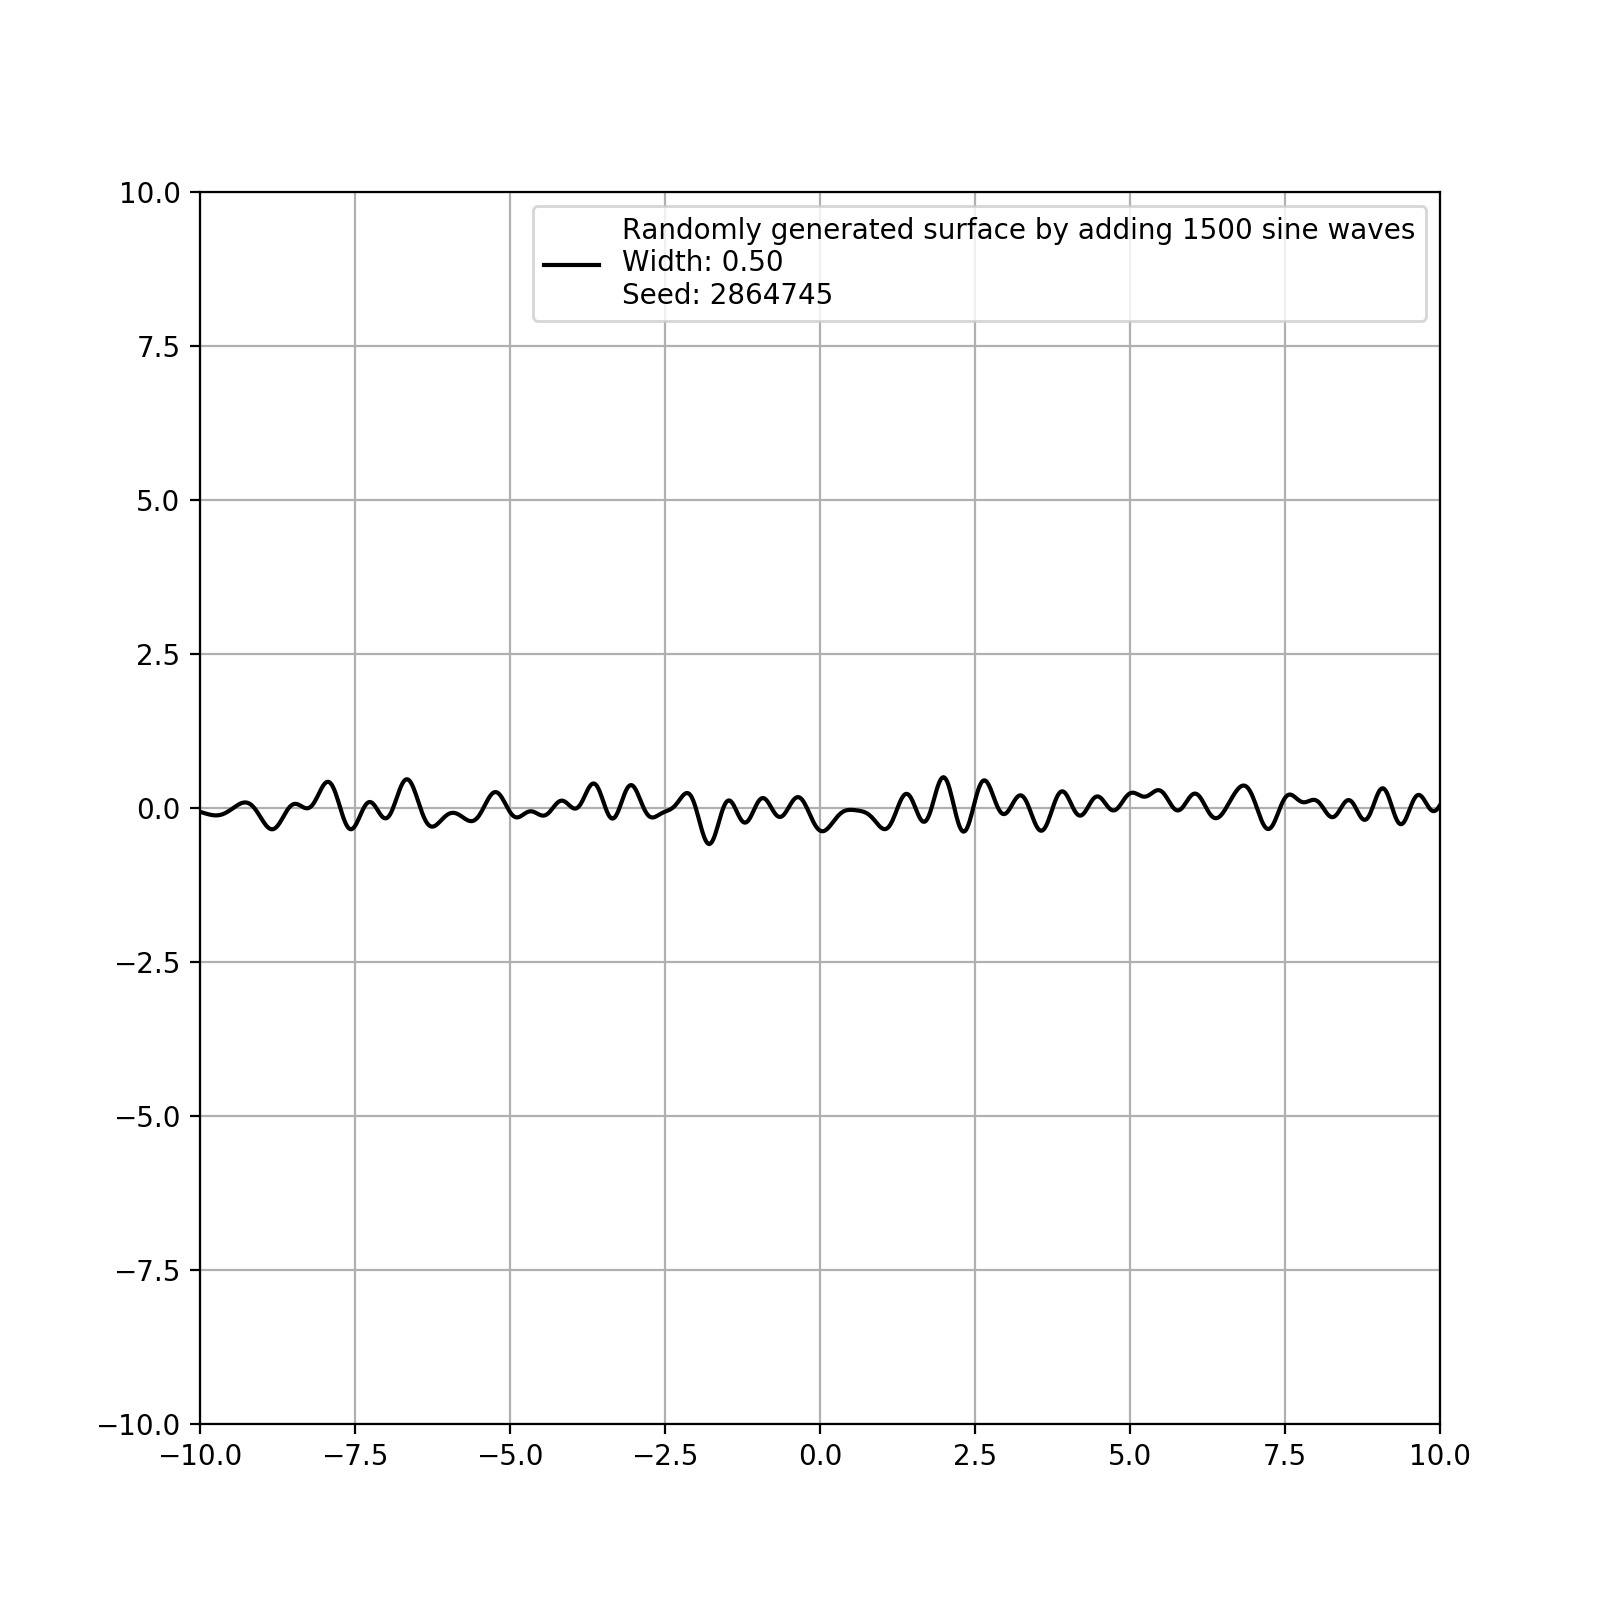

In [5]:
#
#2D Case
#

#Bounds
xmin = -10
xmax = 10

#Number of points in the boundary
Npts = 1000

#xaxis
x = np.linspace(xmin,xmax,Npts)

#Number of waves to add
Nwaves = 1500

#Ranges for random wave generation
#impurity density (The higher it is the rougher it will be)
density = 0.1

#Frequency
fmin = 0
fmax = (xmax-xmin)*density

#Biases
bmin = 0
bmax = 2*np.pi

#seed
seed = 2864745
np.random.seed(seed)

#Surface Impurity width
width = 0.5

data = np.zeros(len(x))
f = fmin+np.random.rand(Nwaves)*(fmax-fmin)
b = bmin+np.random.rand(Nwaves)*(bmax-bmin)

for i in range(Nwaves):
    data+=np.sin(2*np.pi*f[i]*x+b[i])

data*=width/max(data)

plt.figure(figsize=(8,8))
plt.plot(x,data,c='k',label="Randomly generated surface by adding %d sine waves\nWidth: %.2f\nSeed: %d"%(Nwaves,width,seed))
plt.xlim(xmin,xmax)
plt.ylim(xmin,xmax)
plt.legend()
plt.grid()

<IPython.core.display.Javascript object>


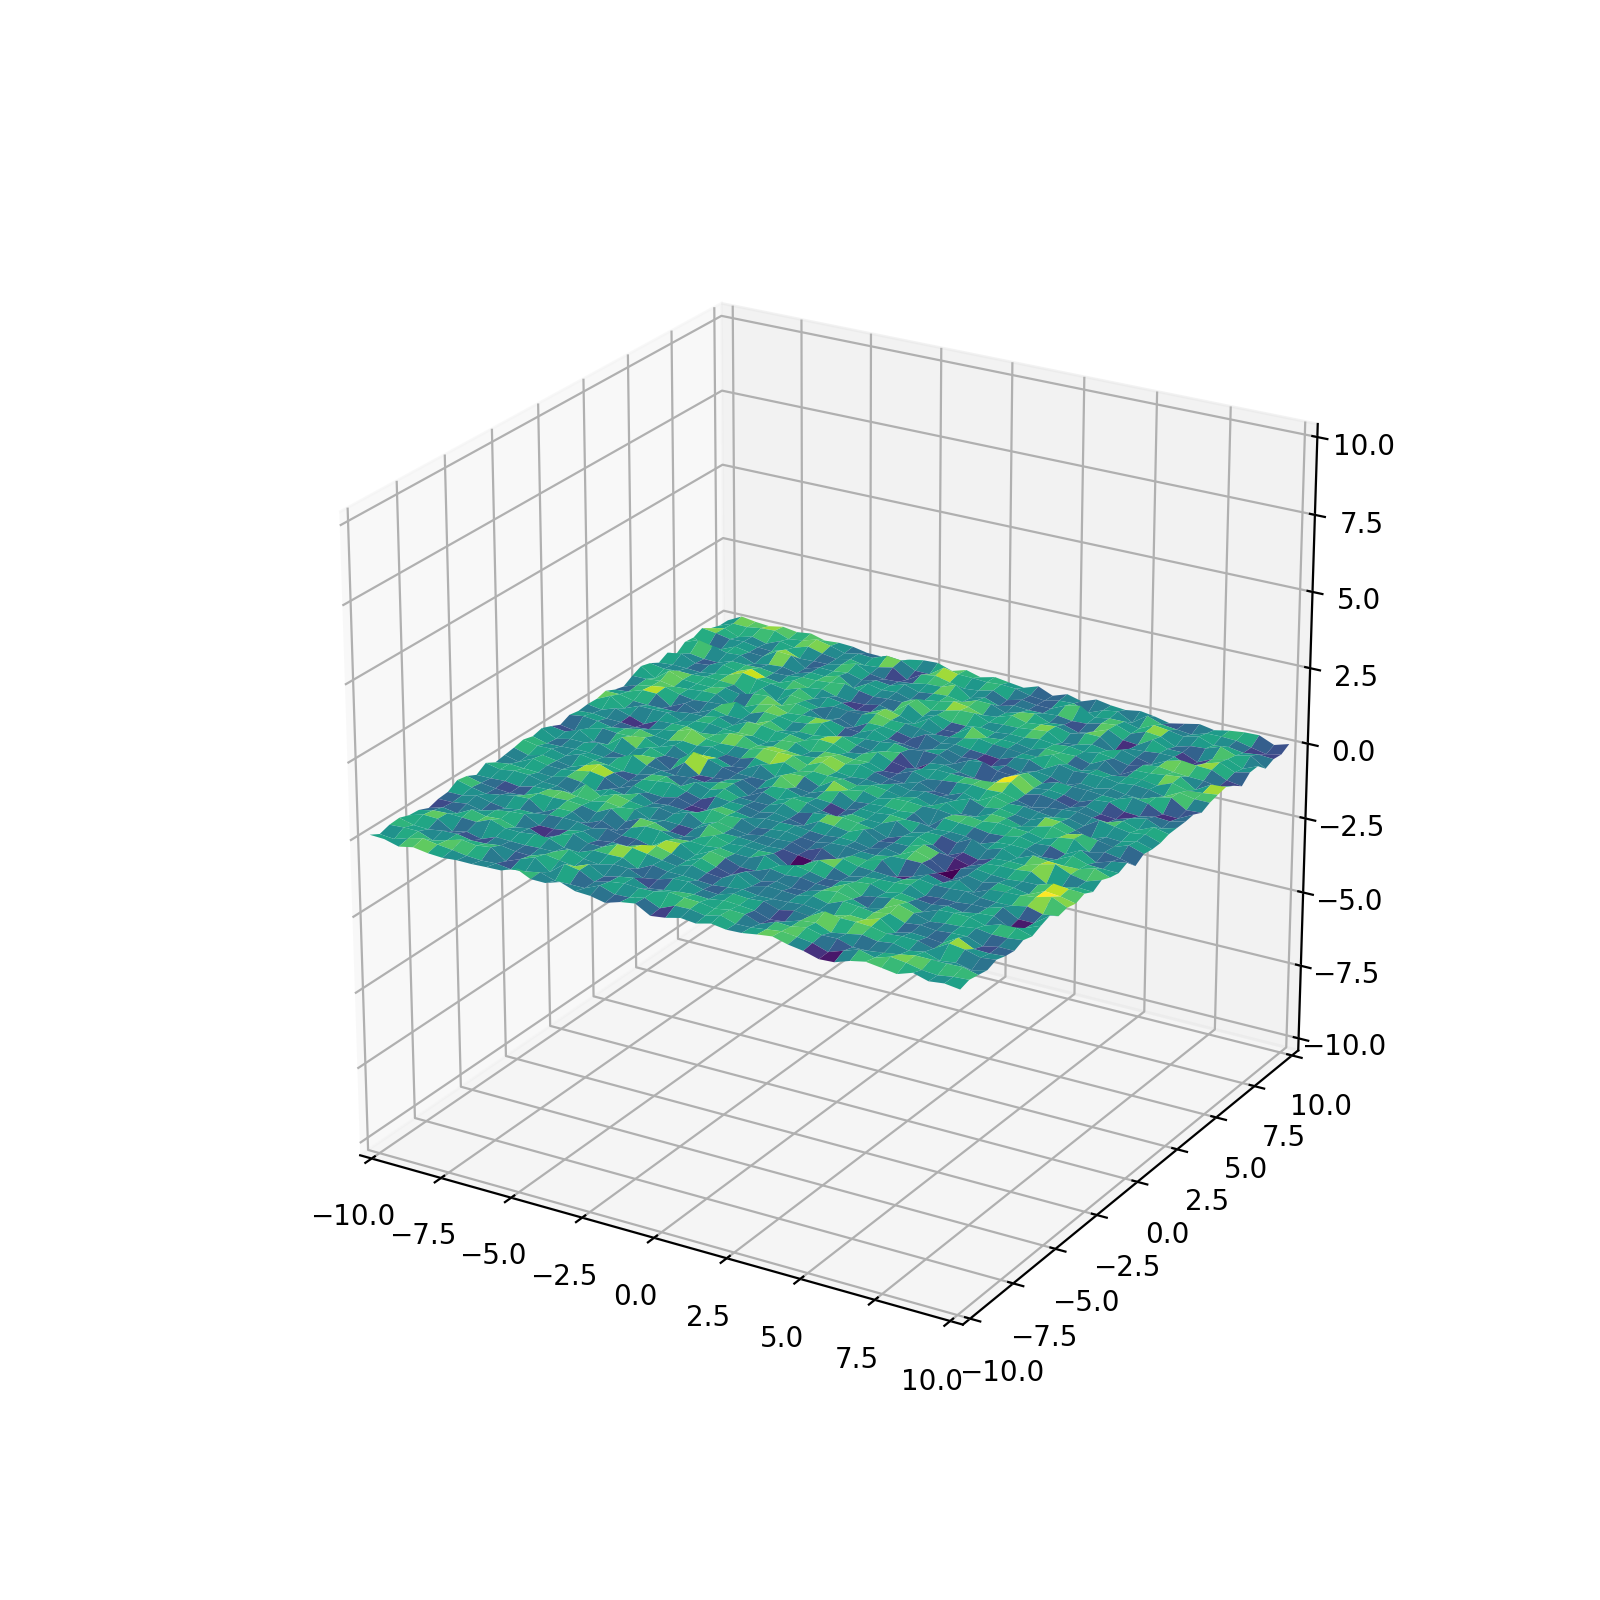

(-10, 10)

In [6]:
#
# 3D Case
#


#Bounds
xmin = -10
xmax = 10
ymin = -10
ymax = 10

#Number of points in the boundary for each axis
Npts = 40

#axes
x = np.linspace(xmin,xmax,Npts)
y = np.linspace(ymin,ymax,Npts)
xx,yy = np.meshgrid(x,y)

#Number of waves to add
Nwaves = 400

#Ranges for random wave generation
#impurity density (The higher it is the rougher it will be)
density = 0.5

#Frequency
fminX = 0
fmaxX = (xmax-xmin)*density
fminY = 0
fmaxY = (ymax-ymin)*density

#Biases
bmin = 0
bmax = 2*np.pi

#seed
seed = 3546576
np.random.seed(seed)

#Surface Impurity width
width = 0.3

data = xx-xx
fx = fminX+np.random.rand(Nwaves)*(fmaxX-fminX)
fy = fminY+np.random.rand(Nwaves)*(fmaxY-fminY)
b = bmin+np.random.rand(Nwaves)*(bmax-bmin)

for i in range(Nwaves):
    data+=np.sin(2*np.pi*fx[i]*xx+2*np.pi*fy[i]*yy+b[i])

data=data*width/np.max(data)

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.plot_surface(xx,yy,data,rstride=1, cstride=1,cmap='viridis', 
                label="Randomly generated surface by adding %d sine waves\nWidth: %.2f\nSeed: %d"%(Nwaves,width,seed))
ax.set_xlim(xmin,xmax)
ax.set_ylim(xmin,xmax)
ax.set_zlim(xmin,xmax)
# plt.legend()

